In [1]:
from datasets import load_dataset
import pandas as pd

/home/yash/anaconda3/envs/pyenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('newdata.csv')
data.head()

,subreddit,post_type,post_title,post_body,post_score,post_upvotes,post_downvotes,comment,comment_score,post_date,comment_date,ideology_score,ideology
0,Liberal,hot,Bill Gates and climate change,Apparently I was too upset earlier when I post...,10,7,3,Bill Gates isn’t a scientific expert on the to...,11,2025-10-29 16:51:35,2025-10-29 17:23:38,0.5,left-leaning
1,Liberal,hot,Bill Gates and climate change,Apparently I was too upset earlier when I post...,10,7,3,"So, he hasn't given up on climate, he's just c...",4,2025-10-29 16:51:35,2025-10-29 17:43:16,0.5,left-leaning
2,Liberal,hot,Bill Gates and climate change,Apparently I was too upset earlier when I post...,10,7,3,Bill Gates is very likely on the Epstein list ...,10,2025-10-29 16:51:35,2025-10-29 17:05:24,0.5,left-leaning
3,Liberal,hot,Bill Gates and climate change,Apparently I was too upset earlier when I post...,10,7,3,"OP, you have linked to an opinion article abou...",3,2025-10-29 16:51:35,2025-10-29 17:43:20,0.5,left-leaning
4,Liberal,hot,Bill Gates and climate change,Apparently I was too upset earlier when I post...,10,7,3,I’ve taken runny shits with more integrity tha...,5,2025-10-29 16:51:35,2025-10-29 17:04:56,0.5,left-leaning


In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [4]:
# i want only subreddit, post_title, post_body, commment, ideology_score, ideology columns
data = data[['subreddit', 'post_title', 'post_body', 'comment', 'ideology_score', 'ideology']]
data.head()

,subreddit,post_title,post_body,comment,ideology_score,ideology
0,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,Bill Gates isn’t a scientific expert on the to...,0.5,left-leaning
1,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,"So, he hasn't given up on climate, he's just c...",0.5,left-leaning
2,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,Bill Gates is very likely on the Epstein list ...,0.5,left-leaning
3,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,"OP, you have linked to an opinion article abou...",0.5,left-leaning
4,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,I’ve taken runny shits with more integrity tha...,0.5,left-leaning


In [5]:
data = data.fillna('')

In [6]:
# Map ideology_score values: 0→0, -1→-2, 1→2, 0.5→1, -0.5→-1
mapping = {0: 2, -1: 0, 1: 4, 0.5: 3, -0.5: 1}
data['ideology_score'] = data['ideology_score'].map(mapping)
data.head()

,subreddit,post_title,post_body,comment,ideology_score,ideology
0,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,Bill Gates isn’t a scientific expert on the to...,3,left-leaning
1,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,"So, he hasn't given up on climate, he's just c...",3,left-leaning
2,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,Bill Gates is very likely on the Epstein list ...,3,left-leaning
3,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,"OP, you have linked to an opinion article abou...",3,left-leaning
4,Liberal,Bill Gates and climate change,Apparently I was too upset earlier when I post...,I’ve taken runny shits with more integrity tha...,3,left-leaning


In [7]:
data['ideology_score'].value_counts()

ideology_score
2    3417
3    2773
4    1530
1    1521
0     984
Name: count, dtype: int64

In [8]:
data['text'] = data['subreddit'] + ' ' + data['post_title'] + ' ' + data['post_body'] + ' ' + data['comment']
data[['text']].head()


,text
0,Liberal Bill Gates and climate change Apparent...
1,Liberal Bill Gates and climate change Apparent...
2,Liberal Bill Gates and climate change Apparent...
3,Liberal Bill Gates and climate change Apparent...
4,Liberal Bill Gates and climate change Apparent...


In [9]:
data = data[['text', 'ideology_score', 'ideology']]
data.head()

,text,ideology_score,ideology
0,Liberal Bill Gates and climate change Apparent...,3,left-leaning
1,Liberal Bill Gates and climate change Apparent...,3,left-leaning
2,Liberal Bill Gates and climate change Apparent...,3,left-leaning
3,Liberal Bill Gates and climate change Apparent...,3,left-leaning
4,Liberal Bill Gates and climate change Apparent...,3,left-leaning


In [10]:
# split the data into train and test set 
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train.head()

,text,ideology_score,ideology
0,conservatives USA smokes Canada in brutal hock...,1,right-leaning
1,Politics Justice Department Told Trump in May ...,4,highly left-leaning
2,Liberal Götterdämmerung THEORY: Trump knows th...,4,highly left-leaning
3,democrats Dr. Neil deGrasse Tyson Questions Qu...,4,highly left-leaning
4,conservatives I think Elon musk is NOT a Nazi....,2,centrist


In [11]:
from datasets import Dataset

In [12]:
train_hf = Dataset.from_pandas(train)
test_hf = Dataset.from_pandas(test)

In [13]:
print(train_hf)

Dataset({
    features: ['text', 'ideology_score', 'ideology'],
    num_rows: 8180
})


In [14]:
# i also want to use subreddit column as input to the model
# the ideology_score column will be used as label

# Tokenize the text columns
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

train_encodings = train_hf.map(tokenize, batched=True, batch_size=16)
test_encodings = test_hf.map(tokenize, batched=True, batch_size=16)


Map: 100%|██████████| 2045/2045 [00:00<00:00, 4245.54 examples/s]


In [15]:
train_encodings

Dataset({
    features: ['text', 'ideology_score', 'ideology', 'input_ids', 'attention_mask'],
    num_rows: 8180
})

In [16]:
import torch
import torch.nn as nn

In [17]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device('cuda')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [18]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
    if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {"hidden state": last_hidden_state[:, 0].cpu().numpy()}



In [19]:
train_encodings.set_format("torch", columns=['text', 'ideology_score', 'ideology', 'input_ids', 'attention_mask'])
test_encodings.set_format("torch", columns=['text', 'ideology_score', 'ideology', 'input_ids', 'attention_mask'])

In [20]:
print(type(train_encodings[0]['input_ids']))  # Should output: <class 'torch.Tensor'>
print(train_encodings[0]['input_ids'].shape)

<class 'torch.Tensor'>
torch.Size([382])


In [21]:
train_hidden_states = train_encodings.map(extract_hidden_states, batched=True, batch_size=8)

Map: 100%|██████████| 8180/8180 [01:18<00:00, 104.62 examples/s]


In [22]:
test_hidden_states = train_encodings.map(extract_hidden_states, batched = True, batch_size = 8)

Map: 100%|██████████| 8180/8180 [01:18<00:00, 104.41 examples/s]


In [23]:
train_hidden_states.column_names

['text',
 'ideology_score',
 'ideology',
 'input_ids',
 'attention_mask',
 'hidden state']

In [24]:
test_hidden_states.column_names

['text',
 'ideology_score',
 'ideology',
 'input_ids',
 'attention_mask',
 'hidden state']

In [25]:
import numpy as np

In [26]:
X_train = np.array(train_hidden_states['hidden state'])
X_test = np.array(test_hidden_states['hidden state'])
y_train = np.array(train_hidden_states['ideology_score'])
y_test = np.array(test_hidden_states['ideology_score'])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(8180, 768) (8180,)
(8180, 768) (8180,)


In [27]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.6518337408312959

In [28]:
import matplotlib.pyplot as plt

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_pred, y_true):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    _, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()



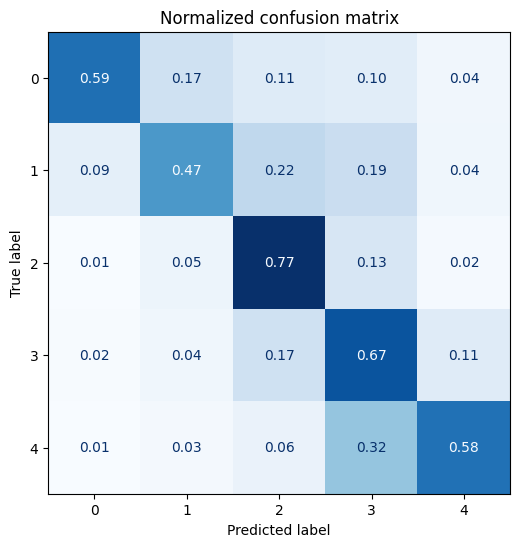

In [30]:
y_pred = lr_clf.predict(X_test)
plot_confusion_matrix(y_pred, y_test)



In [31]:
from transformers import AutoModelForSequenceClassification

num_labels = 5
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
train_encodings = train_encodings.rename_column('ideology_score', 'label')
test_encodings = test_encodings.rename_column('ideology_score', 'label')

In [33]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [34]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(train_encodings) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=8,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    eval_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"
)



In [35]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_encodings,
    eval_dataset=test_encodings,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_17115/2217691867.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.151000,1.003927,0.577017,0.580652
2,0.874600,0.990763,0.610758,0.614931
3,0.660500,1.024074,0.615648,0.618526
4,0.461500,1.306102,0.611736,0.612161
5,0.322900,1.611319,0.609780,0.608272
6,0.239300,1.777772,0.614181,0.613388
7,0.191600,1.981562,0.616626,0.617611
8,0.144900,2.078675,0.613203,0.614732


TrainOutput(global_step=8184, training_loss=0.5053170511957881, metrics={'train_runtime': 2415.7798, 'train_samples_per_second': 27.089, 'train_steps_per_second': 3.388, 'total_flos': 8669130348134400.0, 'train_loss': 0.5053170511957881, 'epoch': 8.0})

In [36]:
preds_output = trainer.predict(test_encodings)

In [37]:
preds_output.metrics

{'test_loss': 2.078674554824829,
 'test_accuracy': 0.6132029339853301,
 'test_f1': 0.6147321228974936,
 'test_runtime': 19.6518,
 'test_samples_per_second': 104.062,
 'test_steps_per_second': 13.027}